### Data
    - A dataset that contains house sale prices between May 2014 and May 2015 in King County, WA.
    - Data source: https://www.kaggle.com/harlfoxem/housesalesprediction
    

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('kc_house_data.csv')

In [ ]:
zip_info = pd.read_csv('zipcode_info.csv')

In [ ]:
# merge df1 and df2 based on the 'zipcode' column
merged_df = pd.merge(df, zip_info[['zipcode', 'population', 'density', 'median_income',
                                  'violent_crime', 'property_crime', 'other_crime']], on='zipcode', how='left')

# add the 'population' column to df1
df['population'] = merged_df['population']
df['density'] = merged_df['density']
df['violent_crime'] = merged_df['violent_crime']
df['property_crime'] = merged_df['property_crime']
df['other_crime'] = merged_df['other_crime']
df['median_income'] = merged_df['median_income']

#### Data Overview Summary and Recommendations

1. There is no missing data and no duplicates.
2. Column 'id' is not used in further study.
3. Column 'date' is the only non-numeric object in the format 'yyyymmddT000000'.
    - Create 'yr_sold', 'mon_sold', and 'day_sold".
4. Column 'zipcode' is int64. Longitude and latitude are also available.
    - Deliberate how these attributes should be used.

### 'date'

In [ ]:
# keep first 8 characters from 'date' in yyyymmdd format
df['date']=df['date'].astype(str).str[0:8]

# create new feature column 'year_sold'
df['yr_sold']=df['date'].astype(str).str[0:4].astype('int32')

# create new feature column 'month_sold'
df['mon_sold']=df['date'].astype(str).str[4:6].astype('int32')

# create new feature column 'day_sold'
df['day_sold']=df['date'].astype(str).str[6:].astype('int32')

In [ ]:
# add a new column for the day of the week of the sales.
import datetime

# Create a new column 'day_of_week' based on 'yr_sold', 'mon_sold', and 'day_sold'
# 1 = Monday, 2 = Tuesday, ..., 7 = Sunday
df['day_of_week'] = df.apply(lambda row: datetime.datetime(row['yr_sold'], row['mon_sold'], row['day_sold']).weekday() + 1, axis=1)



In [ ]:
# df.groupby('day_of_week').size().sort_values(ascending=True)

##### Map the integer values to the corresponding day of the week
day_of_week_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_of_week_map)

In [ ]:
# df.groupby('day_of_week').size().sort_values(ascending=True)

#### zipcode

In [ ]:
# df.groupby('zipcode').size().sort_values(ascending=True)

In [ ]:
# create a function to add columns
# def add_columns_to_df(df, dictionary, column_name):
#    df[column_name] = df['zipcode'].map(dictionary)


In [ ]:
# add the columns using the dictionaries
# add_columns_to_df(df, population_dict, 'population')
# add_columns_to_df(df, density_dict, 'density')
# add_columns_to_df(df, median_home_value_dict, 'median_home_value')
# add_columns_to_df(df, violent_crime_dict, 'violent_crime')
# add_columns_to_df(df, property_crime_dict, 'property_crime')
# add_columns_to_df(df, other_crime_dict, 'other_crime')

In [ ]:
# df['zip_label'] = df['zipcode'].map(zipcode_dict)

#### lat and long

In [ ]:
# longitude and latitude of Seattle downtown, Microsoft Headquarter, and Tacoma International Airport
seattle_locs = [(47.6062, -122.3321), (47.6395, -122.1295), (47.4490, -122.2988)]

In [ ]:
# function for computing distance in miles based on longitudes and latitudes
from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):
    R = 3958.8 # Earth radius in miles

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


In [ ]:
# Create three columns showing the distance to Seattle downtown, Microsoft headquarter, and SEA airport, respective.
for i in range(3):
    lat, lon = seattle_locs[i]
    col_name = f"dist_to_loc{i}"
    df[col_name] = df.apply(lambda row: distance(row['lat'], row['long'], lat, lon), axis=1)

In [ ]:
# df[['dist_to_loc0', 'dist_to_loc1', 'dist_to_loc2', 'lat', 'long']].describe()

In [ ]:
# list of properties with 10 or more bedrooms
df[df['bedrooms']>=10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,property_crime,other_crime,median_income,yr_sold,mon_sold,day_sold,day_of_week,dist_to_loc0,dist_to_loc1,dist_to_loc2
8757,1773100755,20140821,520000.0,11,3.00,3000,4960,2.0,0,0,...,43.76,8.449,57875,2014,8,21,4,3.755625,12.314406,7.977309
13314,627300145,20140814,1148000.0,10,5.25,4590,10920,1.0,0,2,...,49.68,4.461,93521,2014,8,14,4,10.302718,3.768820,12.841519
15161,5566100170,20141029,650000.0,10,2.00,3610,11914,2.0,0,0,...,27.96,2.973,110290,2014,10,29,3,7.725345,5.217464,10.191078
15870,2402100895,20140625,640000.0,33,1.75,1620,6000,1.0,0,0,...,37.68,5.193,75763,2014,6,25,3,5.638311,9.952702,16.567813
19254,8812401450,20141229,660000.0,10,3.00,2920,3745,2.0,0,0,...,47.57,6.293,45560,2014,12,29,1,3.998973,9.020443,14.853614


Out of the five properties with 10 or more bedrooms, the one with 33 is suspecious. Based on the other info about this property, it is most likely that this property has 3 bedrooms, rather than 33. We change it in the dataset below.

In [ ]:
df.at[15870, 'bedrooms'] = 3

In [ ]:
# df['basement%']=df['sqft_basement']/df['sqft_living']

In [ ]:
# df['sqft_living%']=df['sqft_living']/df['sqft_living15']
# df['sqft_lot%']=df['sqft_lot']/df['sqft_lot15']

In [ ]:
# df.groupby('grade').size().sort_values(ascending=True)

In [ ]:
# df['grade'] = df['grade'].apply(lambda x: 4 if x < 4 else x)

In [ ]:
# df['age']=df['yr_sold'] - df['yr_built']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   sqft_living     21613 non-null  int64  
 6   sqft_lot        21613 non-null  int64  
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = df.drop(['id', 'date', 'zipcode'], axis=1)

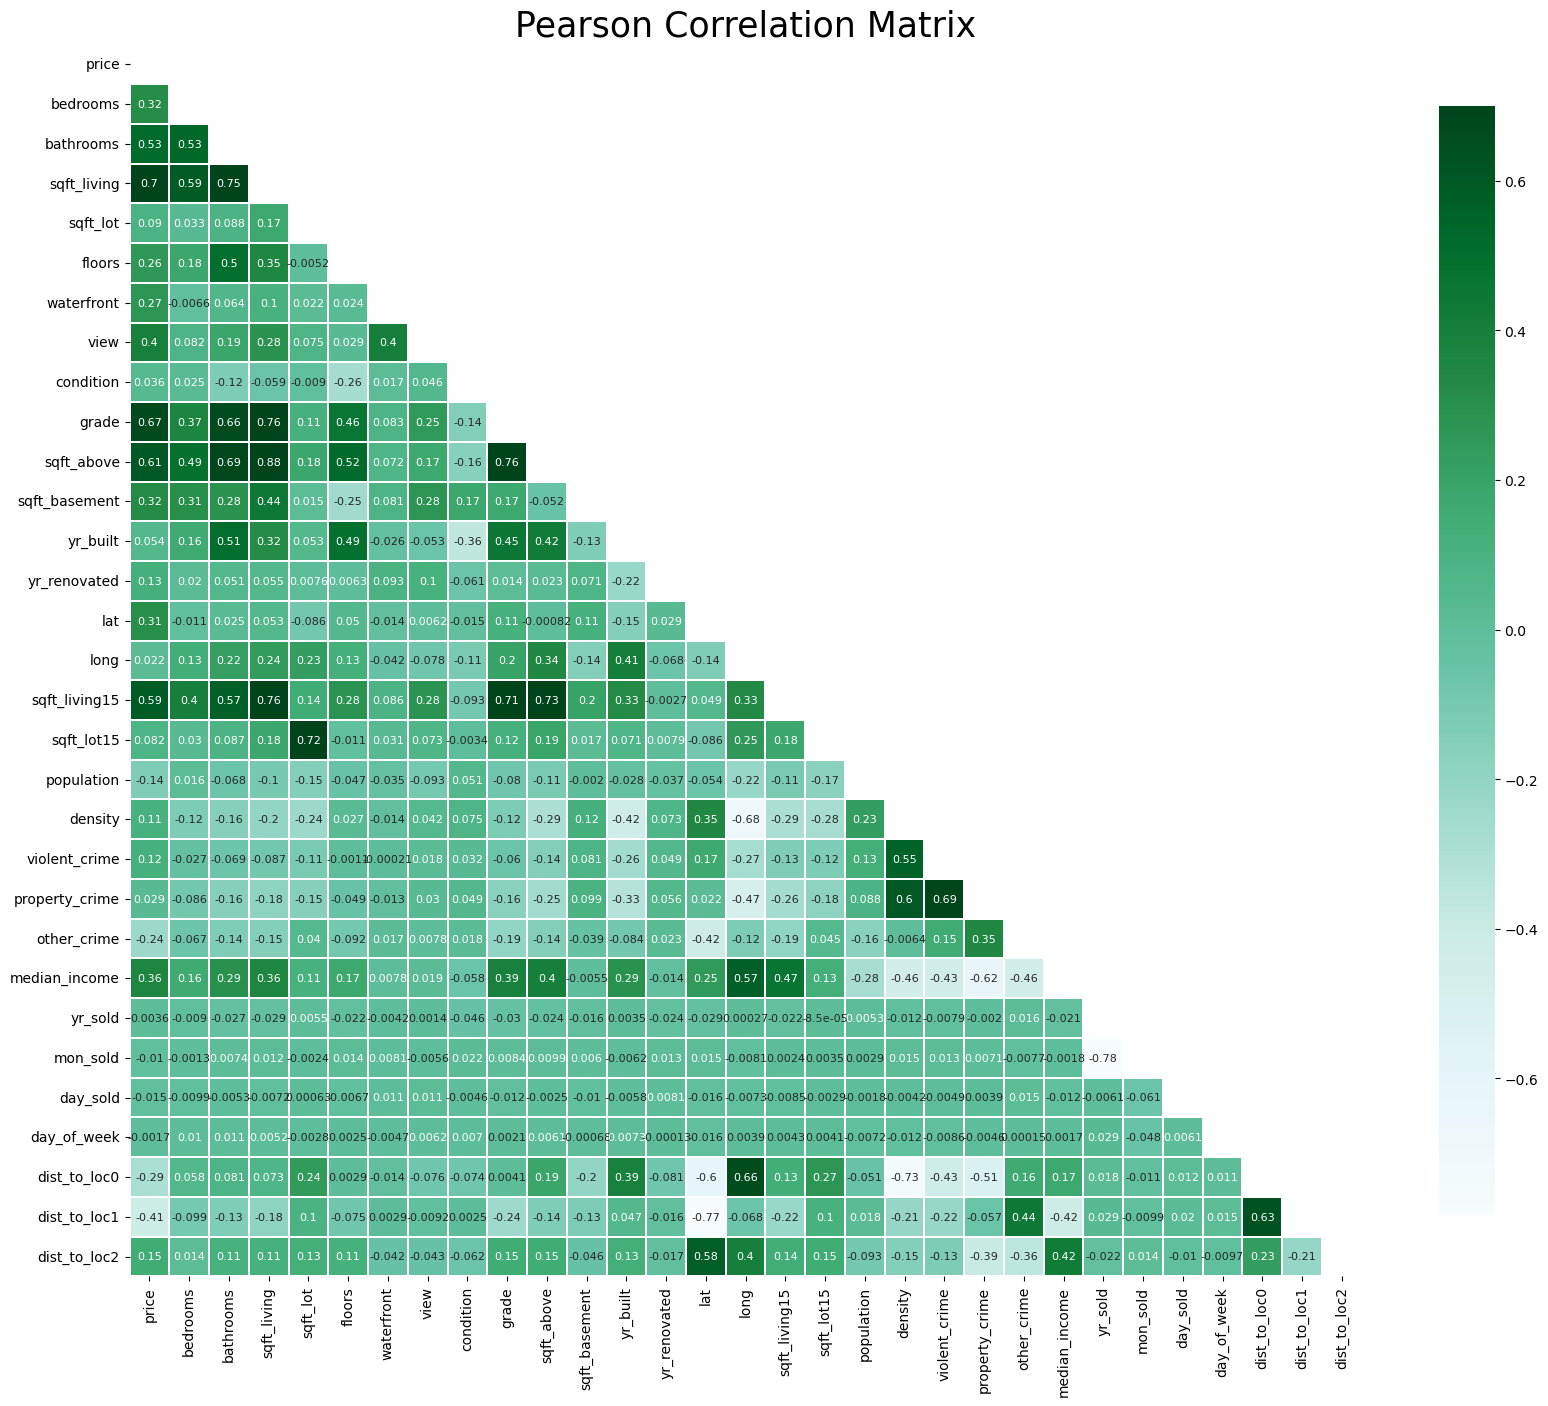

In [ ]:
# features = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
#            'view','condition','grade','basement%', 'sqft_living%','sqft_lot%', "sqft_living15", 'sqft_lot15',
#           'age', 'yr_renovated', 'yr_sold', 'mon_sold', 'day_sold', 'day_of_week',
#            'dist_to_loc0', 'dist_to_loc1', 'dist_to_loc2', 'population', 'density',
#           'median_home_value', 'violent_crime', 'property_crime', 'other_crime']

features =list(df.columns)

mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 16))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [ ]:
df = df.drop(['day_sold'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float64
 1   bedrooms        21613 non-null  int64  
 2   bathrooms       21613 non-null  float64
 3   sqft_living     21613 non-null  int64  
 4   sqft_lot        21613 non-null  int64  
 5   floors          21613 non-null  float64
 6   waterfront      21613 non-null  int64  
 7   view            21613 non-null  int64  
 8   condition       21613 non-null  int64  
 9   grade           21613 non-null  int64  
 10  sqft_above      21613 non-null  int64  
 11  sqft_basement   21613 non-null  int64  
 12  yr_built        21613 non-null  int64  
 13  yr_renovated    21613 non-null  int64  
 14  lat             21613 non-null  float64
 15  long            21613 non-null  float64
 16  sqft_living15   21613 non-null  int64  
 17  sqft_lot15      21613 non-null 

In [ ]:
df.to_csv('data3_0505.csv')